In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
import sqlite3

In [185]:
con = sqlite3.connect(r"D:\Pass word predictor\password_data.sqlite")

In [186]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [187]:
data.shape

(100000, 3)

In [188]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


# Data Cleaning

In [189]:
#Duplicate rows 
#Missing rows

In [190]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [191]:
# Index is a irrelavent column
data.drop(["index"],axis=1 ,inplace =True)

In [192]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [193]:
data.duplicated().sum()
#No duplicate values


0

In [194]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [195]:
data.dtypes

password    object
strength     int64
dtype: object

In [196]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# Performing semantic analysis

In [197]:
data["password"][0]

'zxe870819'

In [198]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [199]:
data[data["password"].str.isnumeric()].shape


(26, 2)

In [200]:
data[data["password"].str.isupper()].shape


(1506, 2)

In [201]:
data[data["password"].str.isalpha()].shape


(50, 2)

In [202]:
data[data["password"].str.isalnum()].shape


(97203, 2)

In [203]:
data[data["password"].str.istitle()].shape
#first character is in upper case


(932, 2)

In [204]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [205]:
import string

In [206]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [207]:
def find_special(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [208]:
data[data["password"].apply(find_special) == 1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# Feature engineering

In [209]:
data["password"][0]

'zxe870819'

In [210]:
len(data["password"][0])


9

In [211]:
password = "himanshu654"

In [212]:
data["Length"] = data["password"].str.len()

In [213]:
[char for char in password if char.islower()]

['h', 'i', 'm', 'a', 'n', 's', 'h', 'u']

In [214]:
len([char for char in password if char.islower()])/len(password)

0.7272727272727273

In [215]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)


In [216]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)


In [217]:
def freq_numericalcase(row):
    return len([char for char in row if char.isdigit()])/len(row)


In [218]:
data["Lower_frq"] = np.round(data["password"].apply(freq_lowercase),3)
data["upper_frq"] = np.round(data["password"].apply(freq_uppercase),3)
data["digit_frq"] = np.round(data["password"].apply(freq_numericalcase),3)


In [219]:
data.head()

,password,strength,Length,Lower_frq,upper_frq,digit_frq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [220]:
def freq_special_Case(row):
    special_Char = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_Char.append(char)
    return len(special_Char)

In [221]:
data["special_Char_freq"] = np.round(data["password"].apply(freq_special_Case),3)

In [222]:
data.head()

,password,strength,Length,Lower_frq,upper_frq,digit_frq,special_Char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [223]:
data["special_Char_freq"]=data["special_Char_freq"]/data["Length"]

In [224]:
data.head()

,password,strength,Length,Lower_frq,upper_frq,digit_frq,special_Char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [225]:
data.columns

Index(['password', 'strength', 'Length', 'Lower_frq', 'upper_frq', 'digit_frq',
       'special_Char_freq'],
      dtype='object')

In [226]:
data[['Length','strength']].groupby(['strength']).agg(['mean','median','min','max'])

Length                
               mean median min  max
strength                           
0          6.550947    7.0   1    7
1          9.611074    9.0   8   13
2         15.953421   16.0  14  220

In [227]:
data.columns

Index(['password', 'strength', 'Length', 'Lower_frq', 'upper_frq', 'digit_frq',
       'special_Char_freq'],
      dtype='object')

In [228]:
cols = [ 'Length', 'Lower_frq', 'upper_frq', 'digit_frq',
       'special_Char_freq']

In [229]:
for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(['mean','median','min','max']))
    print('\n')

    

Length
             Length                
               mean median min  max
strength                           
0          6.550947    7.0   1    7
1          9.611074    9.0   8   13
2         15.953421   16.0  14  220


Lower_frq
         Lower_frq                   
              mean median  min    max
strength                             
0         0.708050  0.714  0.0  1.000
1         0.630067  0.667  0.0  0.923
2         0.424679  0.400  0.0  0.917


upper_frq
         upper_frq                   
              mean median  min    max
strength                             
0         0.012872  0.000  0.0  1.000
1         0.007915  0.000  0.0  0.923
2         0.367633  0.429  0.0  0.889


digit_frq
         digit_frq                   
              mean median  min    max
strength                             
0         0.275383  0.286  0.0  1.000
1         0.360123  0.333  0.0  0.923
2         0.193796  0.188  0.0  0.895


special_Char_freq
         special_Char_freq           

In [230]:
data.columns

Index(['password', 'strength', 'Length', 'Lower_frq', 'upper_frq', 'digit_frq',
       'special_Char_freq'],
      dtype='object')

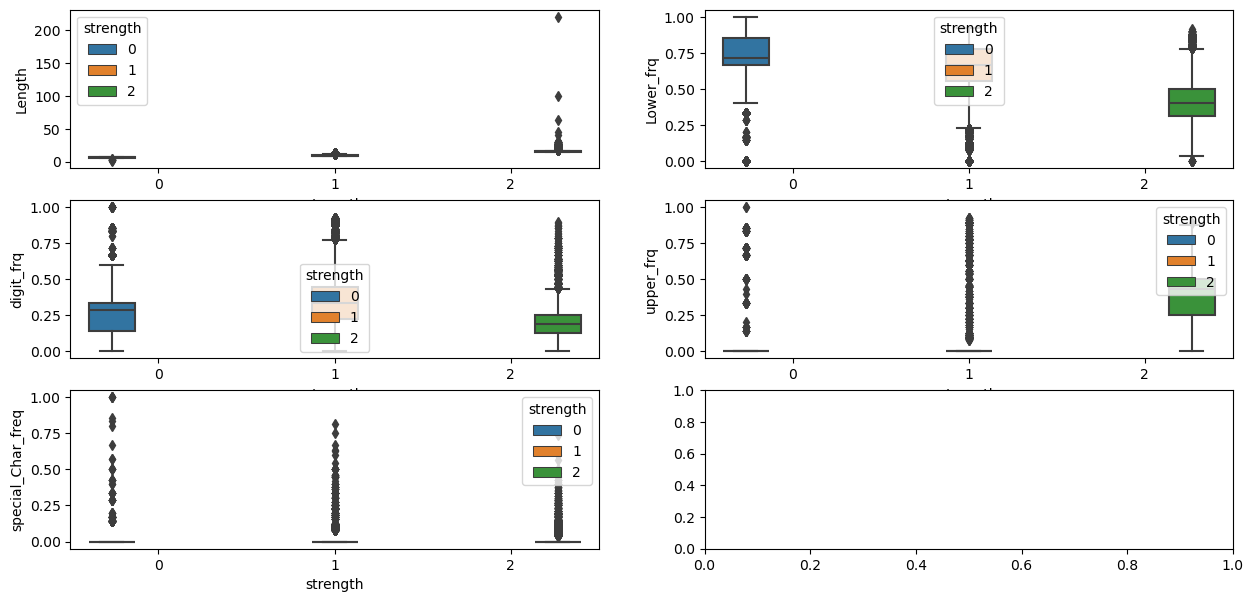

In [231]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (15,7))
sns.boxplot(x = "strength", y='Length' ,hue = "strength",ax=ax1,data=data)
sns.boxplot(x = "strength", y='Lower_frq' ,hue = "strength",ax=ax2,data=data)
sns.boxplot(x = "strength", y= 'digit_frq',hue = "strength",ax=ax3,data=data)
sns.boxplot(x = "strength", y= 'upper_frq',hue = "strength",ax=ax4,data=data)
sns.boxplot(x = "strength", y='special_Char_freq' ,hue = "strength",ax=ax5,data=data)

plt.subplots_adjust()

In [232]:
def get_dist(data,feature):
    plt.subplot(1,2,1)
    sns.violinplot(x = 'strength', y = feature, data=data)

    plt.subplot(1,2,2)
    sns.histplot(data[data['strength']==0][feature],color="red",label = '0')
    sns.histplot(data[data['strength']==1][feature],color="blue",label = '1')
    sns.histplot(data[data['strength']==2][feature],color="orange",label = '2')
    plt.legend()
    plt.show()
    

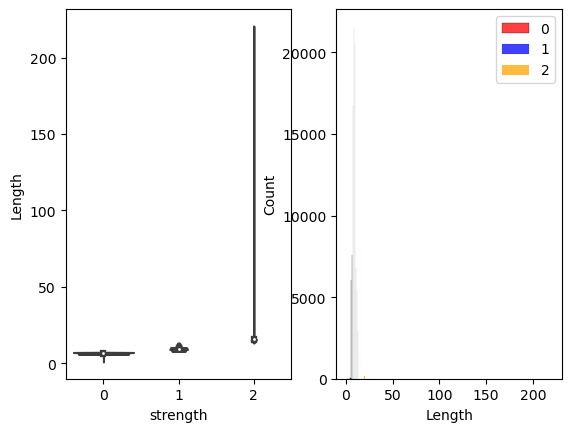

In [233]:
get_dist(data,"Length")

In [234]:
data.columns

Index(['password', 'strength', 'Length', 'Lower_frq', 'upper_frq', 'digit_frq',
       'special_Char_freq'],
      dtype='object')

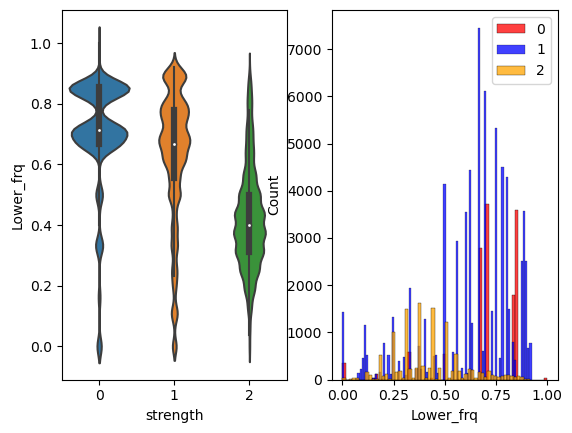

In [235]:
get_dist(data, 'Lower_frq')

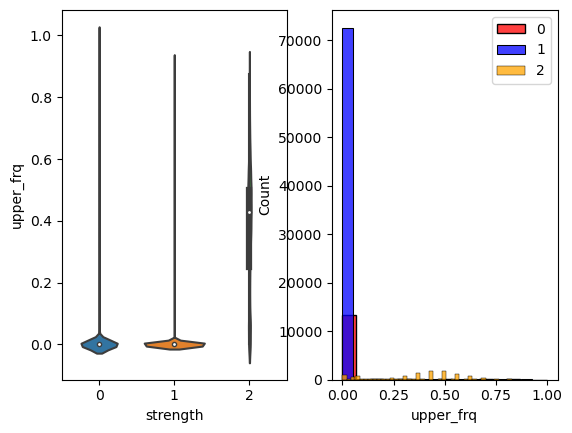

In [236]:
get_dist(data, 'upper_frq')


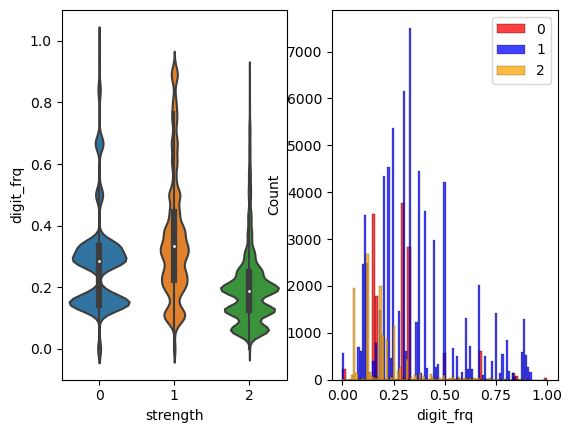

In [237]:
get_dist(data, 'digit_frq')


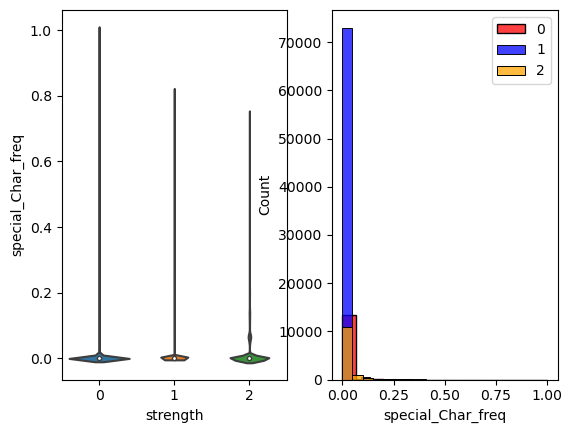

In [238]:
get_dist(data, 'special_Char_freq')


In [239]:
data.head(4)

,password,strength,Length,Lower_frq,upper_frq,digit_frq,special_Char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [240]:
df = data.sample(frac=1)

In [241]:
df

,password,strength,Length,Lower_frq,upper_frq,digit_frq,special_Char_freq
28657,gangstar86,1,10,0.800,0.000,0.200,0.000000
57157,colom013,1,9,0.556,0.000,0.333,0.111111
80288,twm8ccjcat1,1,11,0.818,0.000,0.182,0.000000
33359,klevi10111995,1,13,0.385,0.000,0.615,0.000000
53088,CPfKNADU2MQIzWoX,2,16,0.188,0.750,0.062,0.000000
...,...,...,...,...,...,...,...
90579,sm982010,1,8,0.250,0.000,0.750,0.000000
24485,gendke14,1,8,0.750,0.000,0.250,0.000000
9851,123alsat987,1,11,0.455,0.000,0.545,0.000000
92602,Iceking25022000,2,15,0.400,0.067,0.533,0.000000


In [249]:
x = list(df["password"])

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [243]:
vectorizer = TfidfVectorizer(analyzer="char")

In [250]:
X = vectorizer.fit_transform(x)
##converted the categorical password into vectors

In [262]:
X.shape
#Characters involved in making the single password

(100000, 99)

In [252]:
df['password'].shape

(100000,)

In [256]:
X.toarray().shape

(100000, 99)

In [269]:
X.toarray()[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30808673, 0.        , 0.29716264, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.39097272, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.62062267, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25130493, 0.        , 0.        , 0.        , 0.26040088,
       0.26633429, 0.27721477, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [261]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [260]:
len(vectorizer.get_feature_names_out())

99

In [263]:
df2 = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names_out() )

In [265]:
df2.shape

(100000, 99)

In [270]:
from sklearn.linear_model import LogisticRegression 

In [271]:
Logistics  = LogisticRegression()


In [273]:
data.columns

Index(['password', 'strength', 'Length', 'Lower_frq', 'upper_frq', 'digit_frq',
       'special_Char_freq'],
      dtype='object')